In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df2 = pd.read_csv("/kaggle/input/titanic/test.csv")
df3 = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df.shape


(891, 12)

In [7]:
df2.shape

(418, 11)

In [8]:
df3.shape

(418, 2)

In [9]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df2.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df3.describe()


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [13]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [14]:
df2.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


# Handling Missing Value

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.drop('Cabin', inplace=True, axis=1)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_18/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_18/3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# Feature the data into category

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_Encoder = LabelEncoder()
df['Sex'] = label_Encoder.fit_transform(df['Sex'])
df['Embarked'] = label_Encoder.fit_transform(df['Embarked'])

feature = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[feature]
y= df['Survived']

In [23]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [24]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Build the Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [26]:
X_train,  X_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [27]:
X_train[:3]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.500,2
733,2,1,23.0,0,0,13.000,2
382,3,1,32.0,0,0,7.925,2


In [28]:
X_test[:3]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2


In [29]:
X_train.shape

(712, 7)

In [30]:
y_train.shape

(712,)

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred_test = lr.predict(X_test)

In [33]:
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

In [34]:
y_pred_test_binary[:3]

array([0, 0, 0])

In [35]:
y_test.shape

(179,)

In [36]:
y_pred_test

array([ 0.12362106,  0.24681387,  0.1438528 ,  0.86647691,  0.72243886,
        0.96268986,  0.65763438,  0.08870009,  0.71384991,  0.93672145,
        0.34867525,  0.03146612,  0.4909599 ,  0.1701863 ,  0.22427839,
        0.97548073,  0.32505832,  0.6576625 ,  0.26644004,  0.34017265,
        0.12510392,  0.39203644,  0.62438462,  0.14431438,  0.10871032,
        0.04149244,  0.43777271,  0.24770153,  0.06960021,  0.60690334,
        0.14852706,  0.64902799,  0.49504455,  0.62084921,  0.15326643,
        0.14807276,  0.42332202,  0.65763438,  1.00038989,  0.10636541,
        0.23856065,  0.06264474,  0.10642016,  0.1430278 ,  0.59704215,
        0.07310405,  0.14862026,  0.1302605 ,  0.12480361,  0.34373029,
        0.70866452,  0.78730884, -0.06167418,  0.45413301, -0.03030341,
        0.96035463,  0.24212924,  0.96352779,  0.74641011,  0.6998419 ,
        0.13911491,  0.82889117,  0.74224357,  0.41992229,  0.1430278 ,
        0.63962014,  0.31602914,  0.1016734 ,  0.17230556,  0.87

# Evaluate the Model

In [37]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [38]:
lin_reg_accuracy = accuracy_score(y_test, y_pred_test_binary)


In [39]:
print(f'Linear Regression Accuracy: {lin_reg_accuracy:.2f}')


Linear Regression Accuracy: 0.79


In [40]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_binary))

In [41]:
rmse

0.454647017602145

In [42]:
r2  = r2_score(y_test, y_pred_test_binary)

In [43]:
r2

0.14761904761904754

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [45]:

y_pred = lr.predict(x)

y_pred = (y_pred > 0.5).astype(int)


df['Survived'] = y_pred

In [46]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

# Logistic Regression

In [47]:
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)  # Training the model
lg_score = cross_val_score(lg, x, y, cv=5, scoring='accuracy')
y_pred = lg.predict(x)

print(f'Logistic Regression Average Accuracy: {lg_score.mean():.2f}')


Logistic Regression Average Accuracy: 0.79


In [48]:
y_pred.shape

(891,)

# K-Nearest-Neighbors Classification


In [49]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')

y_pred = knn.predict(x)
print(f'KNN Average Accuracy: {knn_scores.mean():.2f}')


KNN Average Accuracy: 0.69


# SVM CLASSIFICATION

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(x)

svm_scores = cross_val_score(svm, X_train, y_train, cv=3, scoring='accuracy')

print(f'SVM Average Accuracy: {svm_scores.mean():.2f}')


SVM Average Accuracy: 0.79


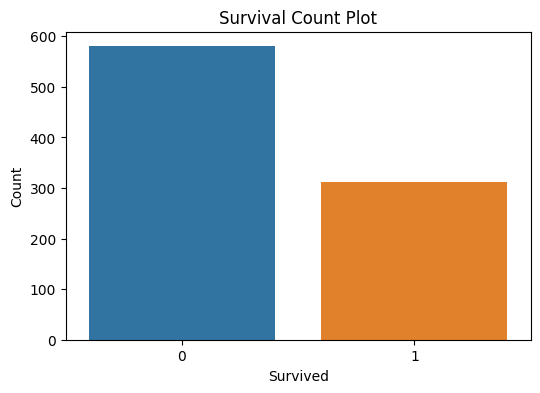

In [51]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count Plot')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


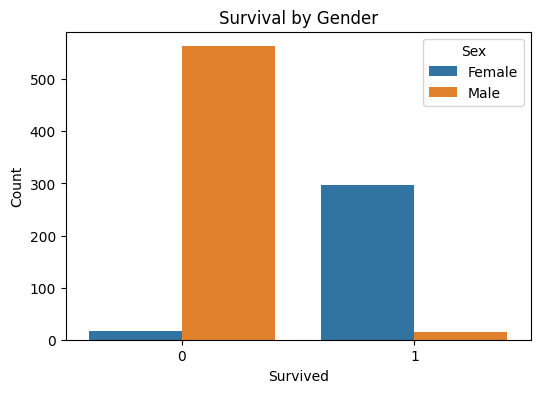

In [52]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()


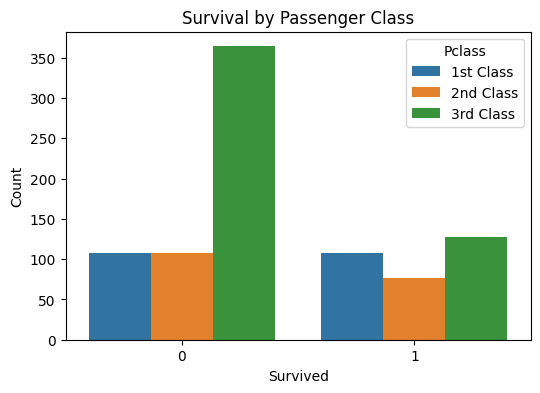

In [53]:


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

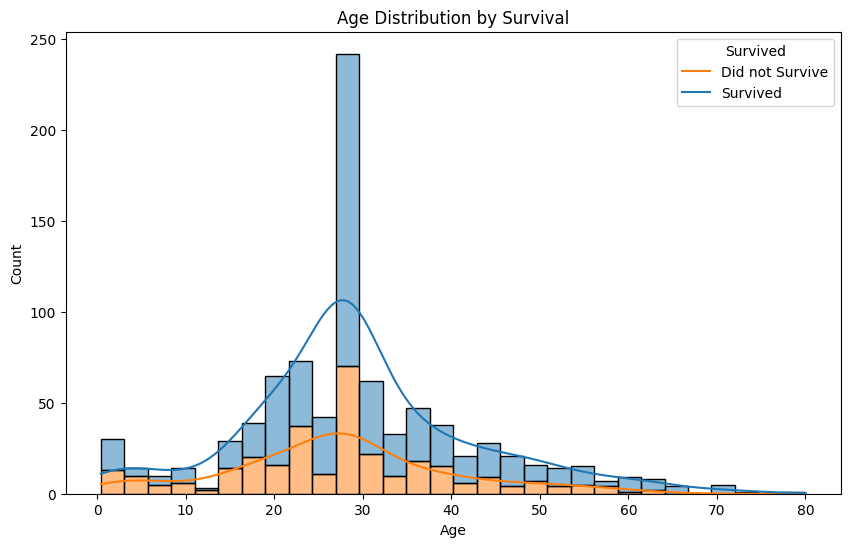

In [54]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.show()

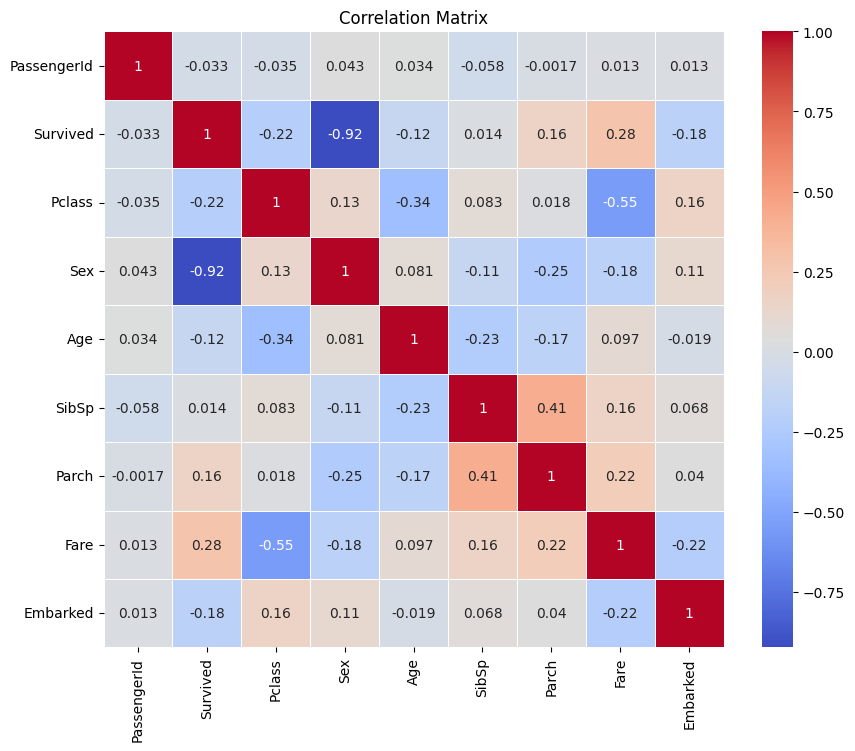

In [55]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [56]:
df.shape

(891, 11)

In [57]:
import pandas as pd

result_df = pd.DataFrame({
    'PassengerId': range(1, 892), 
    'Survived': y_pred
})

# Save to CSV
result_df.to_csv('survivor_predict.csv', index=False)


In [58]:
df2 = pd.read_csv("survivor_predict.csv")
print(df2.tail(50))


     PassengerId  Survived
841          842         0
842          843         1
843          844         0
844          845         0
845          846         0
846          847         0
847          848         0
848          849         0
849          850         1
850          851         0
851          852         0
852          853         1
853          854         1
854          855         1
855          856         1
856          857         1
857          858         0
858          859         1
859          860         0
860          861         0
861          862         0
862          863         1
863          864         1
864          865         0
865          866         1
866          867         1
867          868         0
868          869         0
869          870         0
870          871         0
871          872         1
872          873         0
873          874         0
874          875         1
875          876         1
876          877         0
8

In [59]:
df2.info

<bound method DataFrame.info of      PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         1
889          890         0
890          891         0

[891 rows x 2 columns]>

In [60]:
df2['Survived'].value_counts()

Survived
0    577
1    314
Name: count, dtype: int64